In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (1).csv


In [11]:
ew=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [12]:
ew.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [17]:
ew.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)


In [18]:
ew.set_index('ID',inplace=True)

In [19]:
ew

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [20]:
ew.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [21]:
null= ew.isnull().sum(axis=1).value_counts()

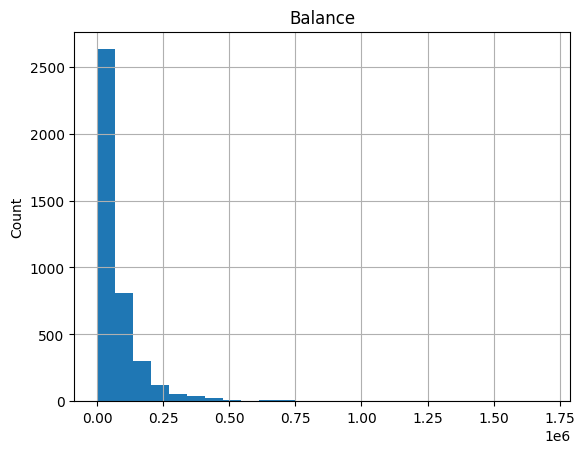

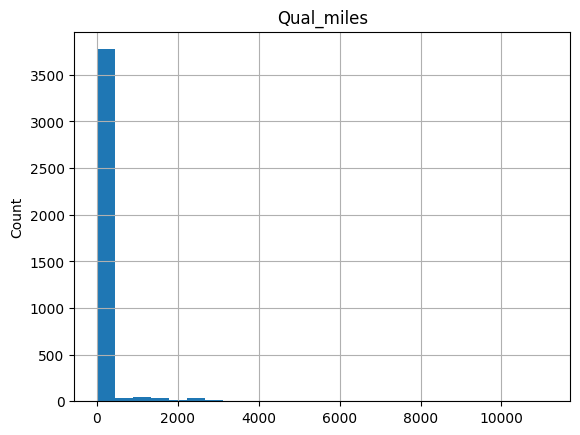

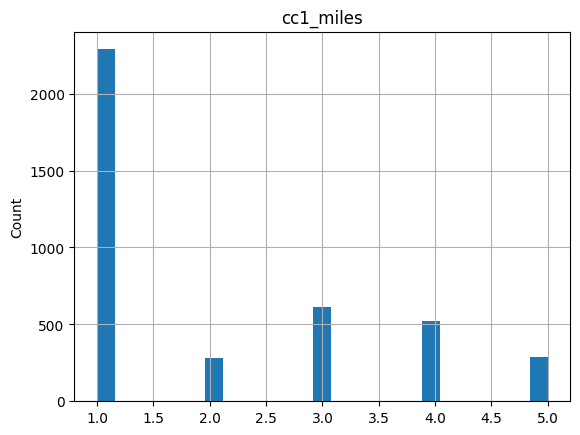

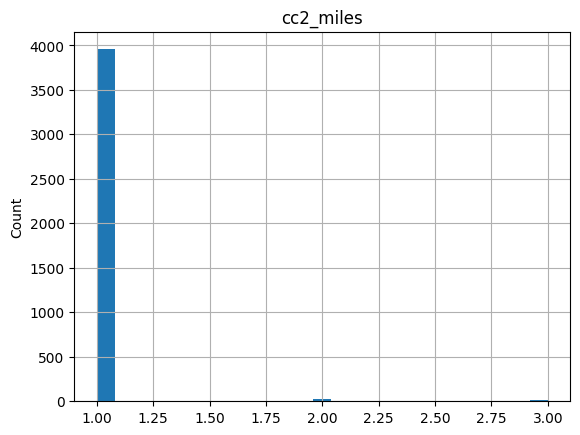

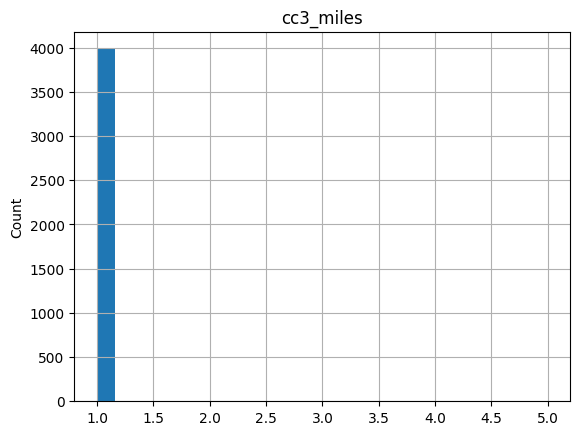

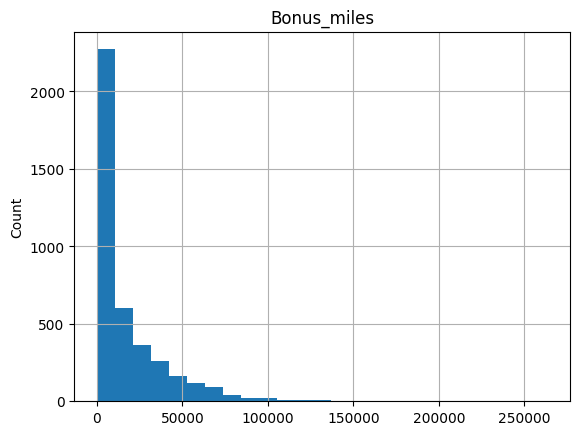

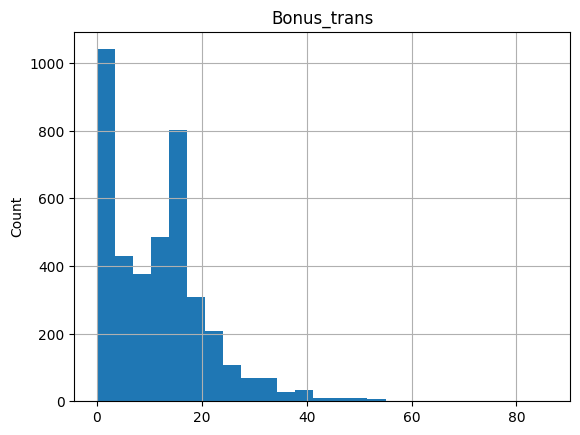

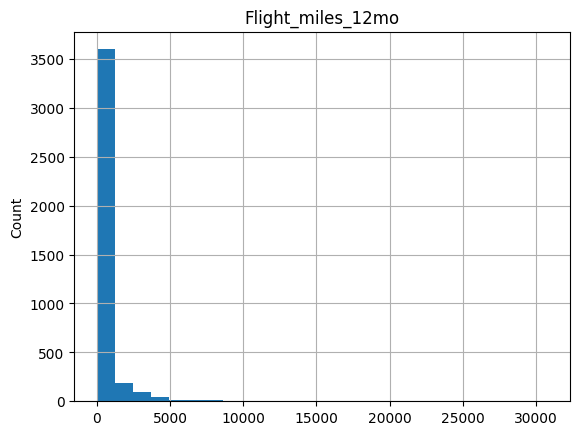

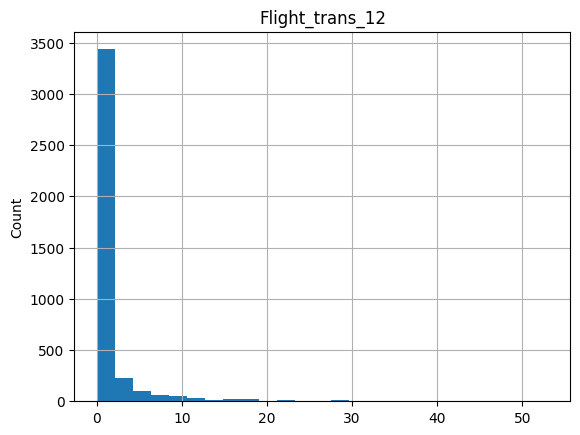

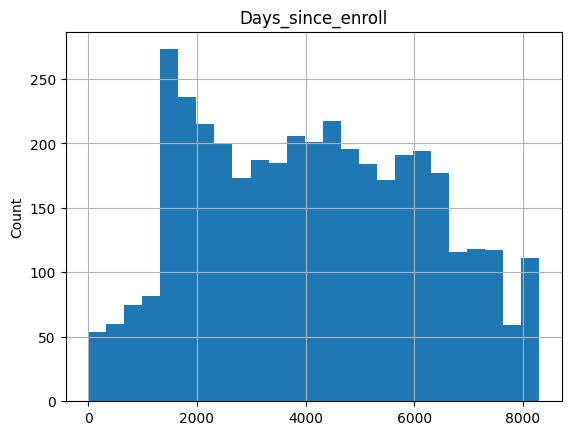

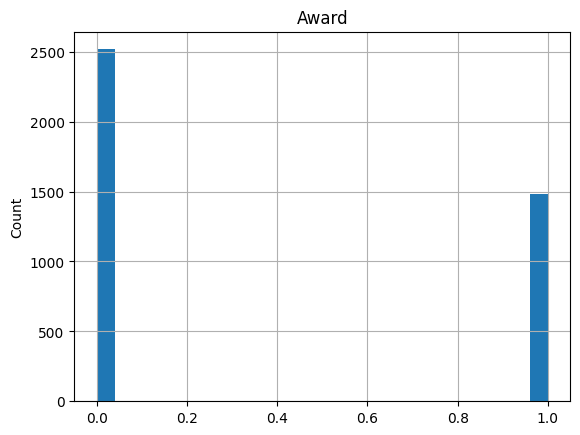

In [22]:
for feature in ew.columns:
    data=ew.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

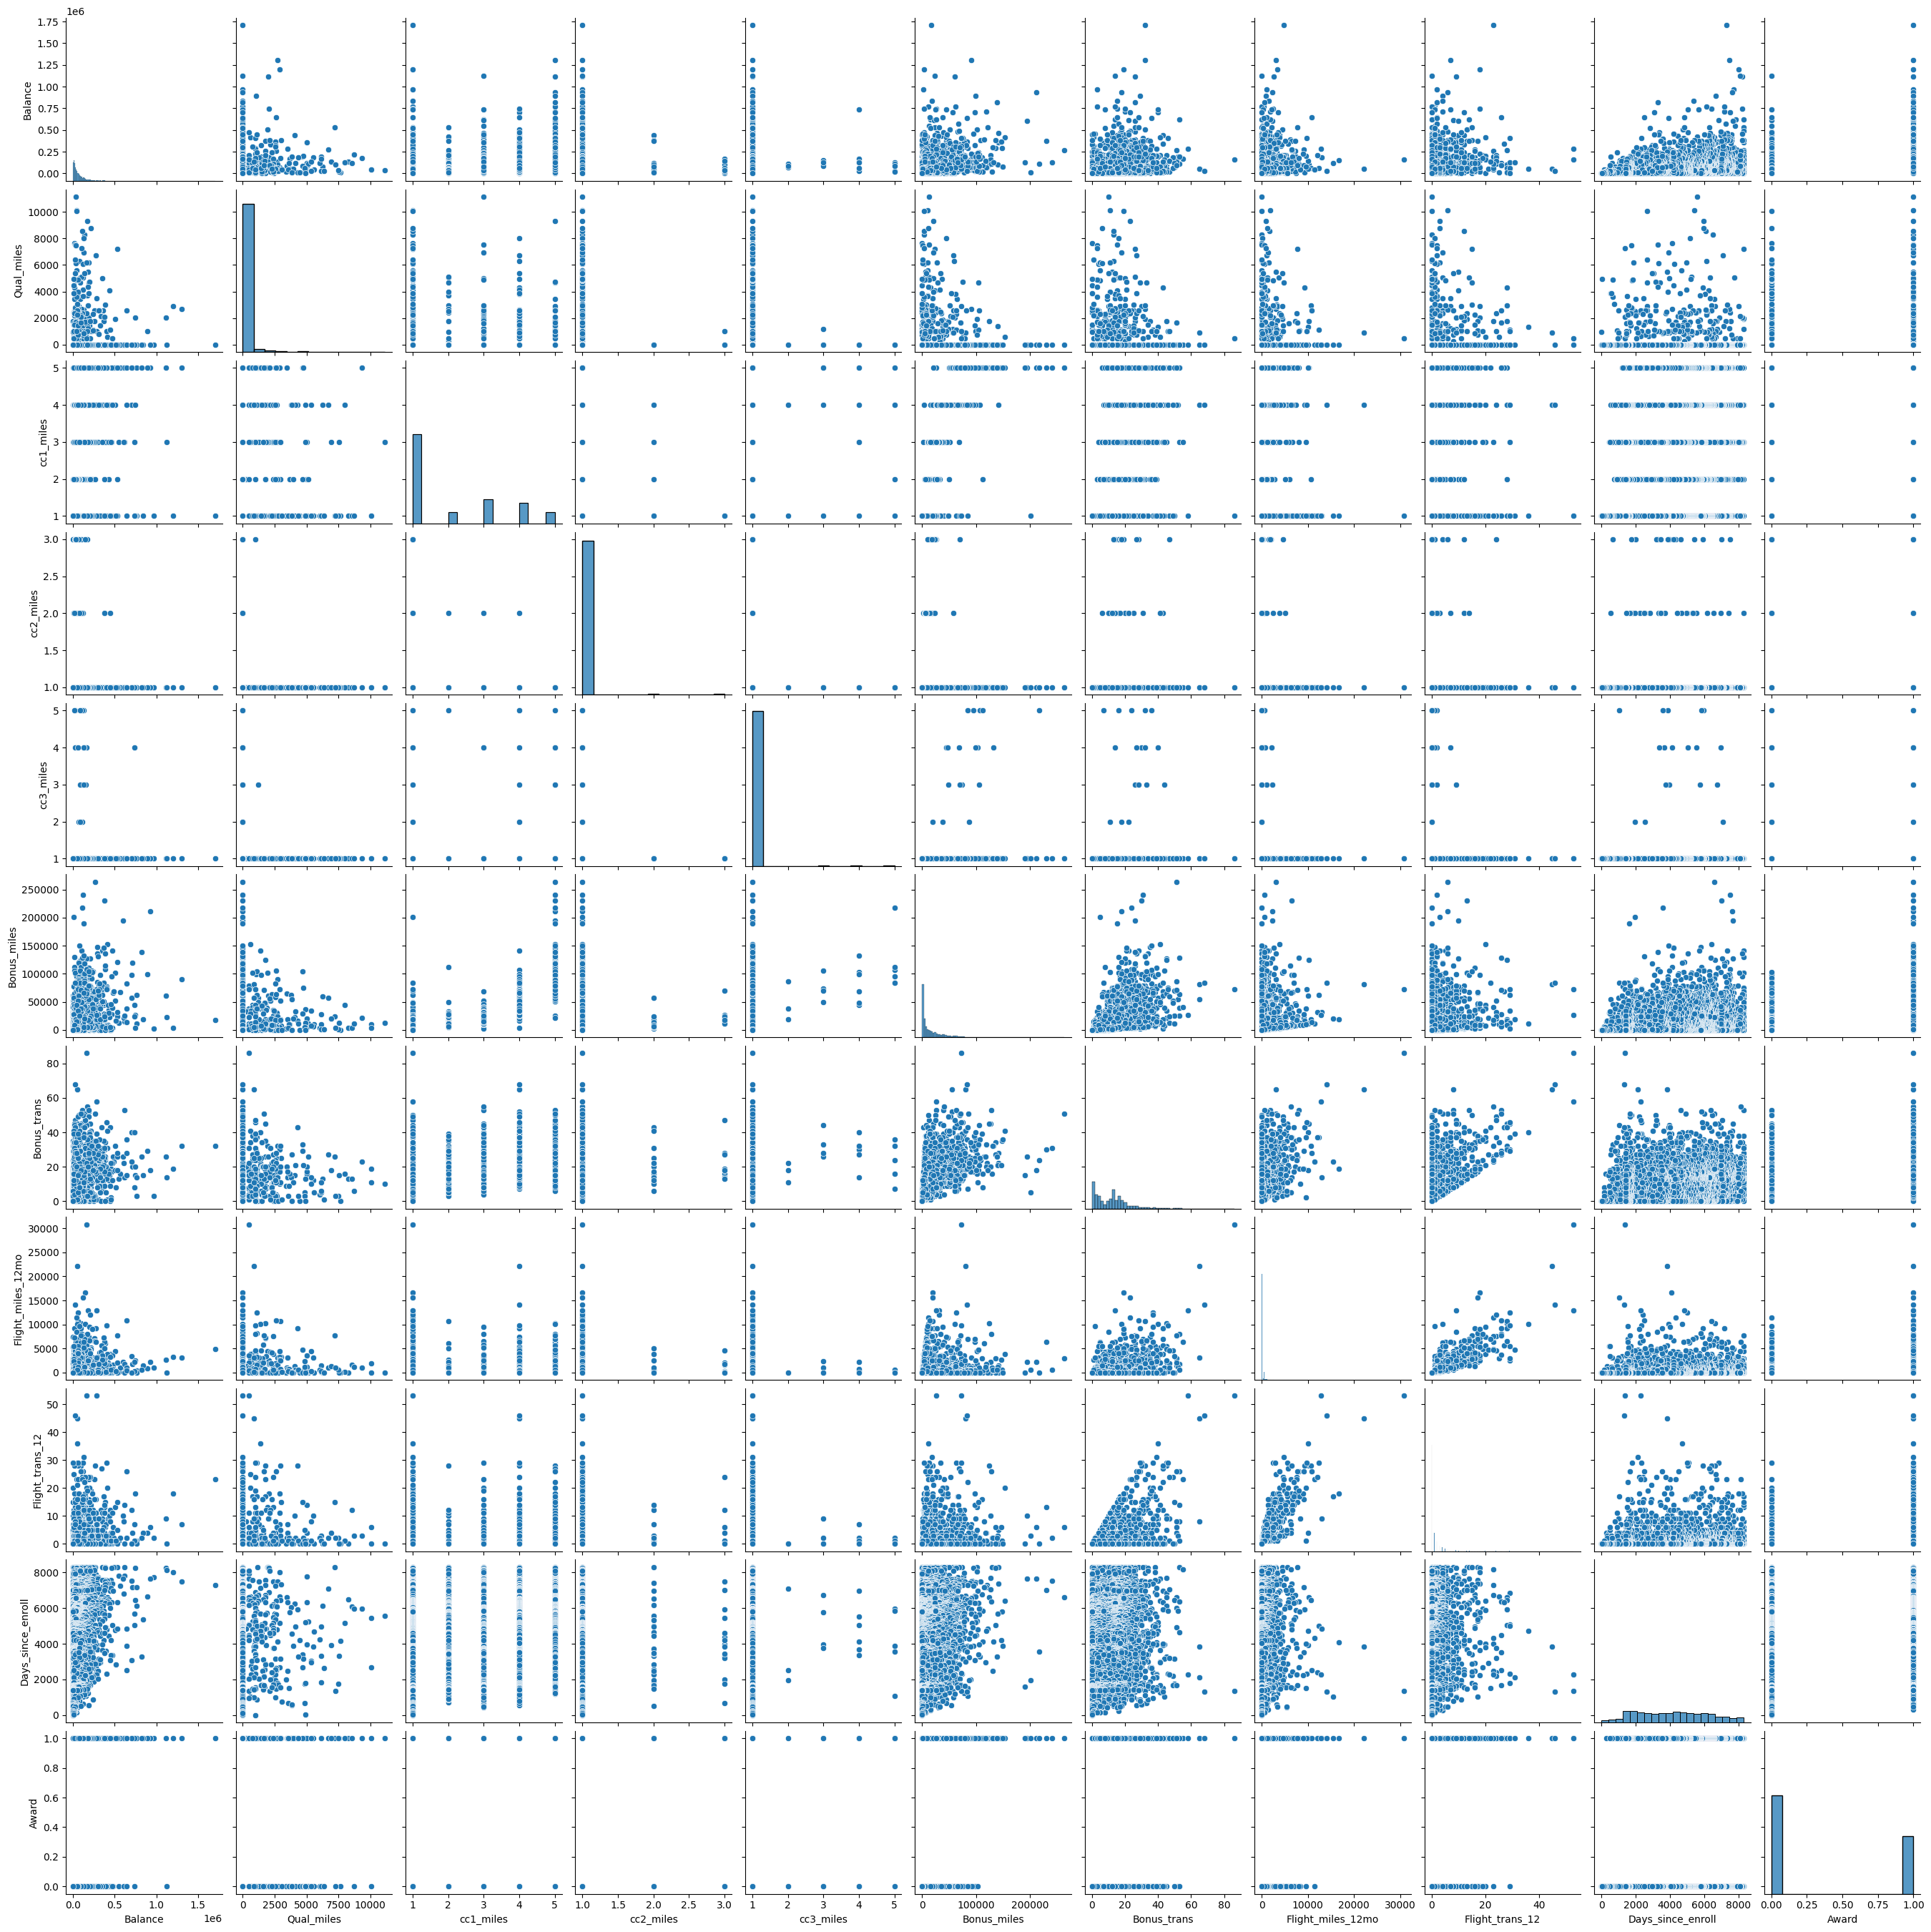

In [23]:
sns.pairplot(ew)

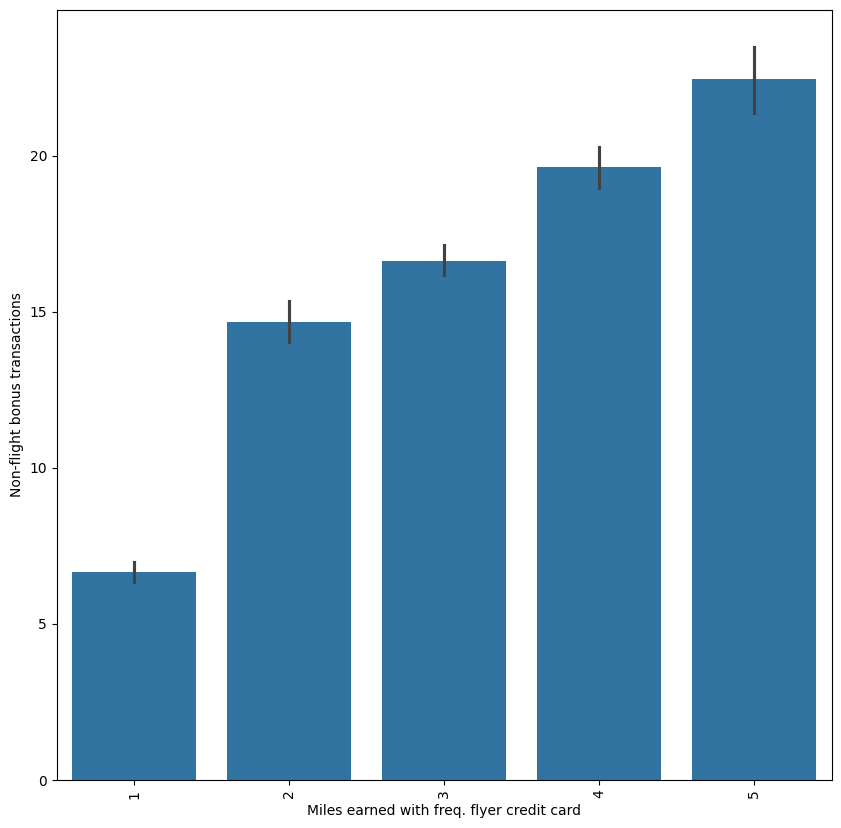

In [25]:
plt.figure(figsize = (10,10))
sorted_data = ew[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

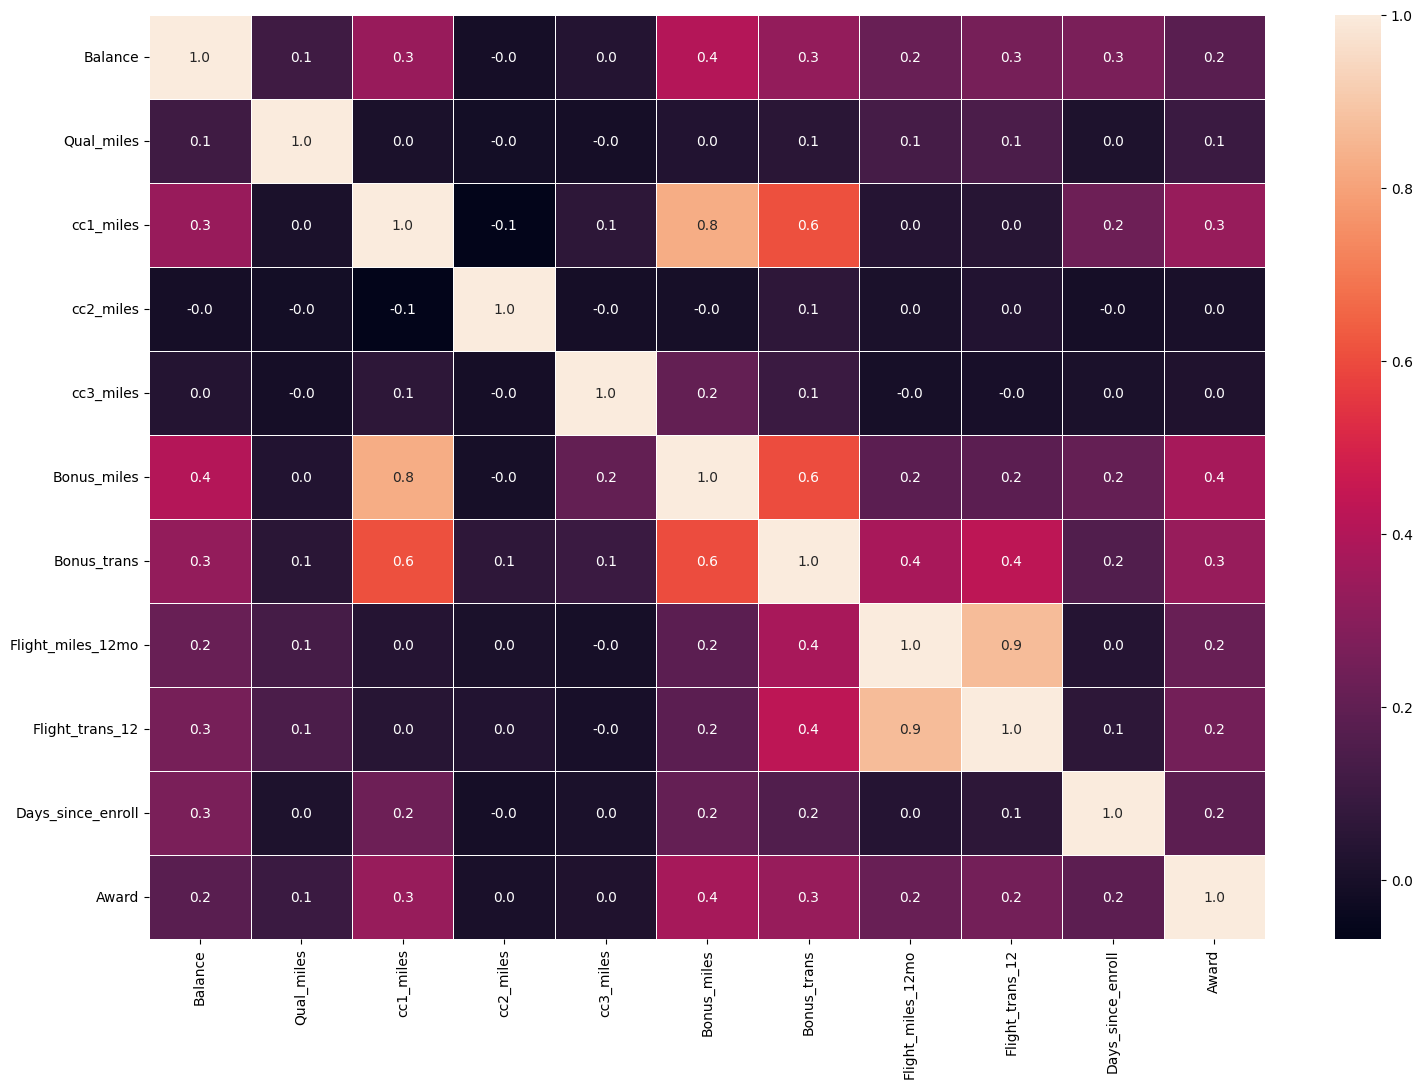

In [26]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(ew.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

In [27]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [30]:
df_norm=norm_func(ew.iloc[:,0:])

In [31]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4017,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


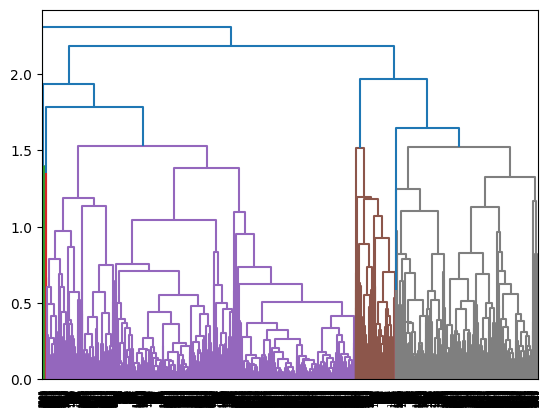

In [34]:
dendo=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [35]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [36]:

y_hc=hc.fit_predict(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [38]:
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [39]:
ew['h_clusterid']=y_hc

In [40]:
ew

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,2


In [42]:
ew1=ew.sort_values('h_clusterid')
ew1.iloc[:,[0,-1]]

,Balance,h_clusterid
ID,,
1,28143,0
2504,23649,0
2506,169794,0
2507,23781,0
2510,5970,0
...,...,...
951,44824,4
3982,13942,4
3802,35850,4


KMEANS


In [43]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

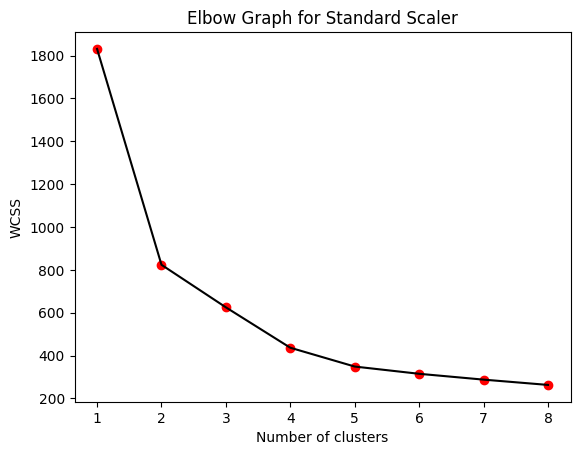

In [45]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [46]:
model=KMeans(n_clusters=5)
model.fit(df_norm)
model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 3, ..., 1, 2, 2], dtype=int32)

In [47]:
x=pd.Series(model.labels_)
ew1['Clust']=x

In [64]:
ew1.head(20)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,Clust
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,3.0
2504,23649,0,1,1,1,3250,16,0,0,3176,0,0,4.0
2506,169794,0,3,1,1,22824,19,767,2,3119,0,0,0.0
2507,23781,0,1,1,1,50,1,50,1,3085,0,0,2.0
2510,5970,0,1,1,1,1000,1,0,0,3091,0,0,4.0
2513,142152,0,3,1,1,19464,13,0,0,3088,0,0,0.0
2514,12713,0,1,1,1,0,0,0,0,3077,0,0,1.0
2515,28848,0,1,1,1,0,0,0,0,3069,0,0,2.0
2516,10940,0,1,1,1,0,0,0,0,3062,0,0,2.0


DBSCAN

In [49]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [50]:
ew3=ew1.iloc[:,0:-1]

In [52]:
stscaler=StandardScaler().fit(ew3.values)
x=stscaler.transform(ew3.values)

In [53]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [54]:
dbscan.labels_

array([0, 0, 0, ..., 5, 6, 6])

In [55]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [56]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,-1
3995,6
3996,5
3997,6


In [59]:
data=pd.concat([ew3,cl],axis=1)

In [63]:
data.head(59)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0,0.0
2504,23649.0,0.0,1.0,1.0,1.0,3250.0,16.0,0.0,0.0,3176.0,0.0,0.0,1.0
2506,169794.0,0.0,3.0,1.0,1.0,22824.0,19.0,767.0,2.0,3119.0,0.0,0.0,2.0
2507,23781.0,0.0,1.0,1.0,1.0,50.0,1.0,50.0,1.0,3085.0,0.0,0.0,1.0
2510,5970.0,0.0,1.0,1.0,1.0,1000.0,1.0,0.0,0.0,3091.0,0.0,0.0,1.0
2513,142152.0,0.0,3.0,1.0,1.0,19464.0,13.0,0.0,0.0,3088.0,0.0,0.0,1.0
2514,12713.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3077.0,0.0,0.0,-1.0
2515,28848.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3069.0,0.0,0.0,1.0
2516,10940.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3062.0,0.0,0.0,1.0
2517,24372.0,0.0,1.0,1.0,1.0,255.0,1.0,255.0,1.0,3064.0,0.0,0.0,1.0
